# BooN basic features

See https://franck-delaplace.github.io/BooN/ for documentation.


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from tabulate import tabulate
from boon import *
from boon.logic import *

### Boolean network definition

In [2]:
from sympy.abc import w, x, y, z, v
boon = BooN({x: y, y: x & z, z: w | ~x & v | y, w: x & y | ~x & z & ~w & ~v, v: ~v & w})

Variables of BooN:

In [3]:
print(boon.variables)

{x, v, w, y, z}


### Print styles

Logical (default):

In [4]:
print(boon)

x = y
v = w ∧ ¬v
w = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬w ∧ ¬x)
y = x ∧ z
z = w ∨ y ∨ (v ∧ ¬x)


Sympy:

In [5]:
boon.style = SYMPY
print(boon)

x = y
v = w & ~v
w = (x & y) | (z & ~v & ~w & ~x)
y = x & z
z = w | y | (v & ~x)


Mathematica:

In [6]:
boon.style = MATHEMATICA
print(boon)

x = y
v = w && !v
w = (x && y) || (z && !v && !w && !x)
y = x && z
z = w || y || (v && !x)


In [7]:
# Default style is LOGICAL
boon.style = LOGICAL

### Delete v

In [8]:
boon.delete(v)
print(boon)

z = w ∨ y ∨ ¬x
w = (x ∧ y) ∨ (z ∧ ¬w ∧ ¬x)
y = x ∧ z
x = y


### Renaming

Rename w to v

In [9]:
boon.rename(w, v)
print(boon)

z = v ∨ y ∨ ¬x
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
y = x ∧ z
x = y


### Stable states

In [10]:
stable = boon.stable_states
tabulate(stable, headers='keys', tablefmt="html")

z,v,y,x
True,True,True,True


Stability constraints in logic:

In [11]:
prettyform(boon.stability_constraints())

'(x ⇔ y) ∧ (y ⇔ (x ∧ z)) ∧ (z ⇔ (v ∨ y ∨ ¬x)) ∧ (v ⇔ ((x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)))'

### Dynamics

#### Asynchronous model

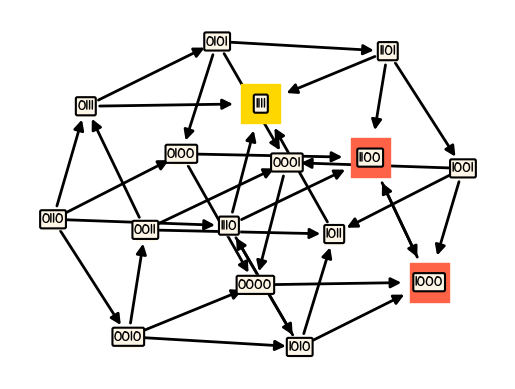

In [12]:
# Define the datamodel of dynamics
M = boon.model()
# initialize figures
_, ax2 = plt.subplots()
ax2.axis('off')
boon.draw_model(M, pos=hypercube_layout(4), ax=ax2)

#### Synchronous model

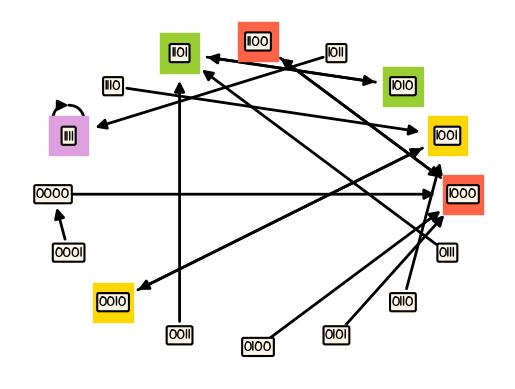

In [13]:
# Synchronous datamodel
MS = boon.model(mode=synchronous, self_loop=True)
_, ax3 = plt.subplots()
ax3.axis('off')
boon.draw_model(MS, pos=nx.shell_layout(MS), ax=ax3)

#### Equilibria

In [14]:
eqs = boon.equilibria(model=MS)
for eq in eqs:
    print(tabulate(eq, headers='keys'))

z     v      y      x
----  -----  -----  -----
True  False  False  False
True  True   False  False
z      v      y      x
-----  -----  -----  -----
True   False  False  True
False  False  True   False
z     v      y      x
----  -----  -----  -----
True  False  True   False
True  True   False  True
z     v     y     x
----  ----  ----  ----
True  True  True  True


### Interaction graph

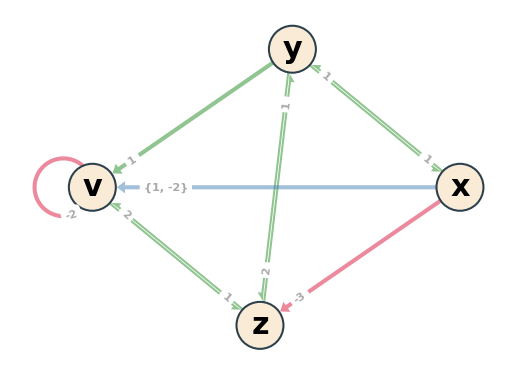

In [15]:
IG = boon.interaction_graph

boon.pos = nx.circular_layout(IG)
_, ax1 = plt.subplots()
ax1.axis('off')
boon.draw_IG(IG, modular=True, ax=ax1)

### Retrieve BooN from the interaction graph

In [16]:
boon.from_ig(IG)
print(boon)

z = v ∨ y ∨ ¬x
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
y = x ∧ z
x = y


### Save and re-load

In [17]:
boon.save("bn")
boon2 = BooN.load("bn")
print(boon2)

z = v ∨ y ∨ ¬x
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
y = x ∧ z
x = y


### CNF conversion

In [18]:
boon2.cnf()
print(boon2)

z = v ∨ y ∨ ¬x
v = (x ∨ z) ∧ (x ∨ ¬v) ∧ (y ∨ ¬x)
y = x ∧ z
x = y


### DNF conversion

In [19]:
boon2.dnf()
print(boon2)

z = v ∨ y ∨ ¬x
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
y = x ∧ z
x = y


### Export and import from text file

In [20]:
boon2.to_textfile('boolnet')
boon2 = BooN.from_textfile('boolnet.txt')
print(boon2)

z = v ∨ y ∨ ¬x
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
y = x ∧ z
x = y


## Import from GINsim, and compute stable states

In [21]:
import biolqm

This notebook has been executed using the docker image `colomoto/colomoto-docker:2024-09-01`

In [22]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/Th_17.zginml")

/notebook/Th_17.zginml

In [23]:
biolqm.save(lqm, "th17.bnet")

'th17.bnet'

In [24]:
b = BooN.from_textfile("th17.bnet")
print(b)

STAT6 = IL4R
Tbet_b2 = (STAT1_b1 ∧ STAT1_b2 ∧ Tbet_b1 ∧ ¬GATA3) ∨ (STAT1_b1 ∧ Tbet_b1 ∧ Tbet_b2 ∧ ¬STAT1_b2) ∨ (Tbet_b1 ∧ Tbet_b2 ∧ ¬GATA3 ∧ ¬STAT1_b1)
IL4 = GATA3 ∧ ¬STAT1_b1
IL12R = IL12 ∧ ¬STAT6
IFNbR = IFNb
IRAK = IL18R
SOCS1 = STAT1_b1 ∨ (Tbet_b1 ∧ ¬STAT1_b1)
IFNb = false
IFNg_b1 = (IFNg_b1 ∧ IFNg_b2) ∨ (Tbet_b1 ∧ ¬IFNg_b1) ∨ (IFNg_b1 ∧ Tbet_b1 ∧ ¬IFNg_b2) ∨ (STAT4 ∧ ¬IFNg_b1 ∧ ¬Tbet_b1) ∨ (IFNg_b1 ∧ STAT4 ∧ ¬IFNg_b2 ∧ ¬Tbet_b1)
IL18 = false
Tbet_b1 = (STAT1_b1 ∧ Tbet_b1 ∧ ¬STAT1_b2) ∨ (Tbet_b1 ∧ Tbet_b2 ∧ ¬STAT1_b1) ∨ (STAT1_b1 ∧ STAT1_b2 ∧ Tbet_b1 ∧ Tbet_b2) ∨ (STAT1_b1 ∧ STAT1_b2 ∧ ¬GATA3 ∧ ¬Tbet_b1) ∨ (STAT1_b1 ∧ ¬GATA3 ∧ ¬STAT1_b2 ∧ ¬Tbet_b1) ∨ (Tbet_b1 ∧ ¬GATA3 ∧ ¬STAT1_b1 ∧ ¬Tbet_b2) ∨ (STAT1_b1 ∧ STAT1_b2 ∧ Tbet_b1 ∧ ¬GATA3 ∧ ¬Tbet_b2)
STAT1_b2 = IFNgR_b1 ∧ IFNgR_b2 ∧ STAT1_b1
IL4R = IL4 ∧ ¬SOCS1
GATA3 = STAT6 ∧ ¬Tbet_b1
IFNgR_b2 = IFNgR_b1 ∧ IFNg_b1 ∧ IFNg_b2 ∧ ¬SOCS1
IL12 = false
IFNgR_b1 = IFNg_b1 ∨ (IFNgR_b1 ∧ IFNgR_b2 ∧ ¬IFNg_b1)
STAT4 = IL12R ∧ ¬GATA3
STAT1_b1 = IFNg

In [25]:
stable = b.stable_states
tabulate(stable, headers='keys', tablefmt="html")

Tbet_b1,GATA3,IL4,IFNg_b1,IFNg_b2,IFNbR,Tbet_b2,IRAK,IFNb,STAT1_b2,IFNgR_b2,IL12,IL4R,IL12R,SOCS1,IFNgR_b1,STAT4,IL18,STAT6,STAT1_b1,IL18R
False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
True,False,False,True,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False
